

# Objetivo

En este trabajo vamos a analizar los datos de hospitalizaciones  generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas como ayuda para entender como estñá progresando la enfermedad.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [3]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [4]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [5]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [6]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [7]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [8]:
df.describe()

,ine_code,new_cases,PCR,TestAc,activos,hospitalized,hospitalized_accumulated,hospitalized_new,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,recovered,deceased_hosp_eus,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,num_casos_cum1,num_casos2,num_hosp,num_uci,num_def,num_casos_cum2,num_hosp_cum,num_uci_cum,num_def_cum,poblacion,cases_per_cienmil,intensive_care_per_1000000,deceassed_per_100000,hospitalized_per_100000,cases_14days,cases_7days,cases_PCR_14days,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_hosp_eus,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,daily_deaths_avg7_hosp_eus,deaths_last_week,num_casos_avg7,num_casos_prueba_pcr_avg7,ia14
count,20880.000000,7145.000000,5701.000000,727.000000,2557.000000,14515.000000,1610.000000,1586.000000,14738.000000,16288.000000,10484.000000,11251.000000,10371.000000,585.000000,20332.000000,20332.000000,20332.000000,20332.000000,20332.000000,20332.000000,20332.000000,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,20852.000000,2.088000e+04,10484.000000,14738.000000,16288.000000,14515.000000,9473.000000,9930.000000,10583.000000,10915.000000,13311.000000,12944.000000,12370.000000,12006.000000,16231.000000,582.000000,15418.0,15336.000000,15906.000000,564.000000,20880.000000,20020.000000,20020.000000,14239.000000
mean,26.497414,137.644647,141.377173,21156.386520,1258.782167,210.382639,10055.341615,956.477932,33.543900,796.906127,15520.330408,17296.707226,5484.296390,391.068376,126.865335,104.845318,0.233917,21.500148,0.181045,0.104909,12743.522870,138.652983,12.393296,1.070785,2.898475,13539.448974,2209.079321,190.387157,534.583157,9.040666e+05,1444.817801,3.667014,93.466733,22.542688,2492.088356,1260.468177,2251.910139,1129.552726,160.000150,158.672219,157.508267,154.987964,4.704639,1.475945,inf,4.687265,4.575569,1.462766,25.120307,127.379890,105.471958,277.520339
std,15.009699,336.967123,273.494373,44876.829018,1795.537174,694.270169,21705.186743,1509.539397,86.826407,2061.856964,33432.713342,51079.656300,11244.885735,243.192336,354.805704,298.712366,1.403417,109.873441,2.067126,1.260073,36583.561122,410.035694,51.610617,4.117999,10.962535,38989.205126,6067.209809,461.365808,1373.758094,1.176197e+06,1707.788515,3.927903,99.136092,24.417111,5019.375384,2605.835629,5904.746758,2993.493643,367.411548,336.213780,458.523881,409.887889,17.872165,1.765594,NaN,17.584519,16.973844,1.358153,104.740363,339.572856,286.488849,322.589538
min,1.000000,-2.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.477700e+04,0.000000,0.000000,0.000000,0.000000,-54.000000,-82.000000,-62.000000,-99.000000,-106.000000,-12.000000,-84.000000,-12.700000,-22.000000,0.000000,-30.8,-6.300000,-0.900000,0.000000,-6.000000,0.000000,0.000000,-6.900000
25%,13.000000,10.000000,11.000000,9.000000,246.000000,22.000000,241.250000,99.000000,3.000000,137.000000,1478.750000,2024.500000,634.000000,219.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,751.000000,1.000000,0.000000,0.000000,0.000000,645.000000,234.000000,29.000000,43.000000,3.167980e+05,209.960000,0.760000,18.877500,4.935000,275.000000,126.000000,85.000000,40.000000,10.000000,13.900000,5.000000,5.900000,0.000000,0.000000,0.0,0.300000,0.300000,0.300000,0.000000,2.100000,2.000000,34.900000
50%,26.000000,44.000000,59.000000,332.000000,631.000000,78.000000,905.000000,359.500000,12.000000,322.000000,4103.000000,4401.000000,1668.000000,285.000000,26.000000,22.000000,0.000000,0.000000,0.000000,0.000000,3041.500000,25.000000,2.000000,0.000000,0.000000,3052.500000,922.000000,79.000000,231.000000,5.810780e+05,668.755000,2.500000,56.040000,15.870000,917.000000,4

y un muestreo de valores y de algunas columnas de interés:

In [9]:
df.head()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,hospitalized_accumulated,hospitalized_new,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,recovered,deceased_hosp_eus,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,num_casos_cum1,num_casos2,num_hosp,num_uci,num_def,num_casos_cum2,num_hosp_cum,num_uci_cum,num_def_cum,poblacion,cases_per_cienmil,intensive_care_per_1000000,deceassed_per_100000,hospitalized_per_100000,cases_14days,cases_7days,cases_PCR_14days,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_hosp_eus,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,daily_deaths_avg7_hosp_eus,deaths_last_week,num_casos_avg7,num_casos_prueba_pcr_avg7,ia14,source_name,source,comments
0,2020-01-01,Albacete,2,Castilla - La Mancha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,Alicante/Alacant,3,Comunitat Valenciana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1858683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,716820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,Araba/Álava,1,País Vasco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,Asturias,33,"Asturias, Principado de",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1022800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.tail()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,hospitalized_accumulated,hospitalized_new,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,recovered,deceased_hosp_eus,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,num_casos_cum1,num_casos2,num_hosp,num_uci,num_def,num_casos_cum2,num_hosp_cum,num_uci_cum,num_def_cum,poblacion,cases_per_cienmil,intensive_care_per_1000000,deceassed_per_100000,hospitalized_per_100000,cases_14days,cases_7days,cases_PCR_14days,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_hosp_eus,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,daily_deaths_avg7_hosp_eus,deaths_last_week,num_casos_avg7,num_casos_prueba_pcr_avg7,ia14,source_name,source,comments
20875,2021-02-05,Soria,42,Castilla y León,80.0,NaN,NaN,NaN,82.0,NaN,NaN,17.0,NaN,NaN,7987.0,899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88636,NaN,19.18,NaN,92.51,NaN,NaN,1136.0,574.0,80.0,82.0,80.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,1281.6,Junta de Castilla y León,https://analisis.datosabiertos.jcyl.es/explore...,NaN
20876,2021-02-05,Toledo,45,Castilla - La Mancha,NaN,434.0,NaN,NaN,566.0,NaN,NaN,97.0,1881.0,NaN,58863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,694844,NaN,13.96,270.71,81.46,NaN,NaN,8896.0,3482.0,NaN,NaN,434.0,552.1,27.0,NaN,NaN,NaN,15.4,NaN,109,NaN,NaN,1280.3,D.G. de Salud Pública. Consejeria de Sanidad. ...,Notas de prensa JCCM 05/02/2020 - 21:45) https...,NaN
20877,2021-02-05,Valencia/València,46,Comunitat Valenciana,3073.0,NaN,NaN,NaN,1728.0,NaN,NaN,341.0,2708.0,178293.0,NaN,151388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2565124,6950.66,13.29,105.57,67.37,40950.0,18762.0,NaN,NaN,3082.0,2680.3,NaN,NaN,50.0,NaN,1.9,47.7,42.9,NaN,300,NaN,NaN,1596.4,Sanidad Generalitat Valenciana,https://www.gva.es/es/inicio/area_de_prensa/no...,NaN
20878,2021-02-05,Valladolid,47,Castilla y León,191.0,NaN,NaN,NaN,390.0,NaN,NaN,103.0,NaN,NaN,45563.0,5760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,519546,NaN,19.83,NaN,75.07,NaN,NaN,5554.0,1955.0,191.0,279.3,191.0,279.3,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,NaN,1069.0,Junta de Castilla y León,https://analisis.datosabiertos.jcyl.es/explore...,NaN
20879,2021-02-05,Zamora,49,Castilla y León,85.0,NaN,NaN,NaN,106.0,NaN,NaN,13.0,NaN,NaN,12244.0,1656.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172539,NaN,7.53,NaN,61.44,NaN,NaN,1492.0,559.0,85.0,79.9,85.0,79.9,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,864.7,Junta de Castilla y León,https://analisis.datosabiertos.jcyl.es/explore...,NaN


In [11]:
provincias = sorted(df['province'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [12]:
df['date']=pd.to_datetime(df['date'])

In [13]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'hospitalized_accumulated',
       'hospitalized_new', 'intensive_care', 'deceased', 'cases_accumulated',
       'cases_accumulated_PCR', 'recovered', 'deceased_hosp_eus', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_ag', 'num_casos_prueba_elisa',
       'num_casos_prueba_desconocida', 'num_casos_cum1', 'num_casos2',
       'num_hosp', 'num_uci', 'num_def', 'num_casos_cum2', 'num_hosp_cum',
       'num_uci_cum', 'num_def_cum', 'poblacion', 'cases_per_cienmil',
       'intensive_care_per_1000000', 'deceassed_per_100000',
       'hospitalized_per_100000', 'cases_14days', 'cases_7days',
       'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_hosp_eus', 'daily_deaths_inc',
       'daily_deaths_avg3', 'daily_deaths_avg7'

In [14]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_nuevos_aragon',
          'Teruel':'casos_nuevos_aragon', 'Zaragoza':'casos_nuevos_aragon', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'PCR', 'Araba/Álava':'casos_nuevos_paisvasco',
          'Bizkaia':'casos_nuevos_paisvasco', 'Gipuzkoa':'casos_nuevos_paisvasco',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

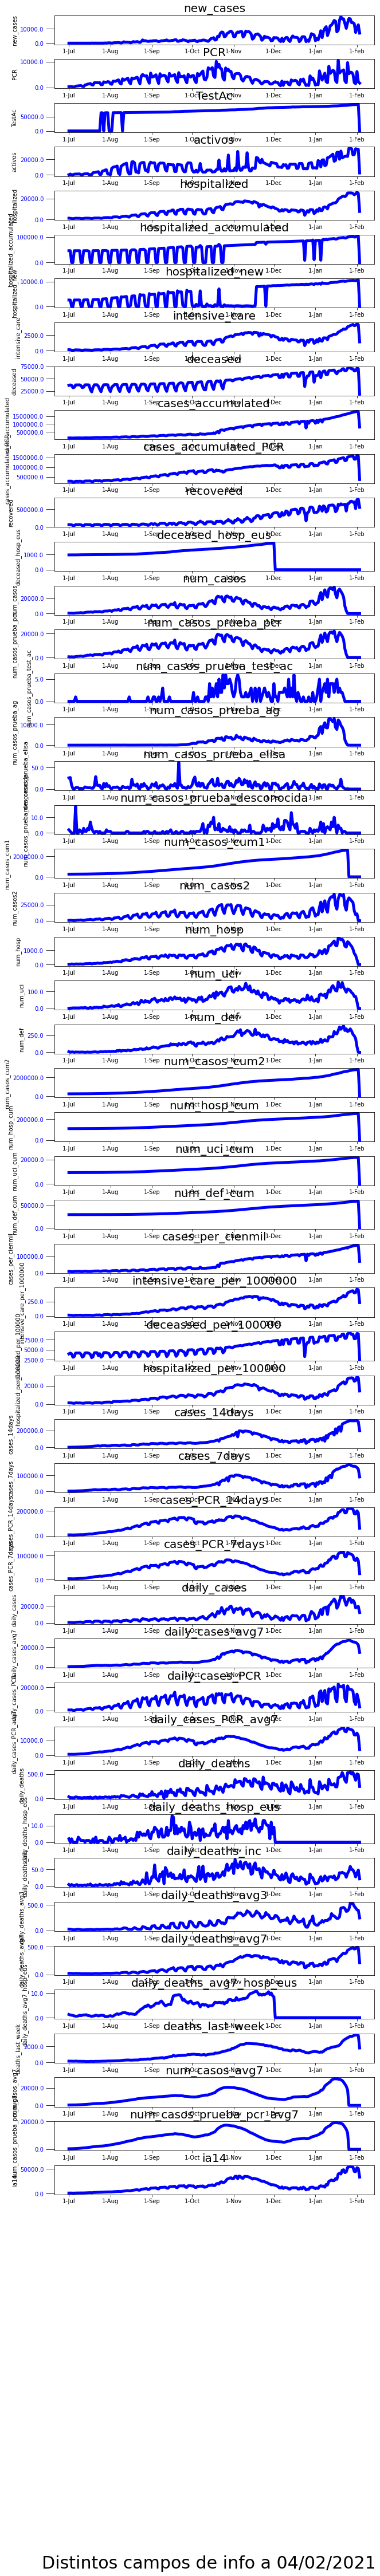

In [14]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [18]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


datos = df.fillna(0,axis=1)
datos = datos.sort_values(by=['province','date'], inplace=False, ascending=True)
provincias = sorted(df['province'].unique())
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

#clave_avg='daily_cases_PCR_avg7'
#clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'

color_ratio = 'red'
color_fill = 'lightblue'
color_titulos = 'navy'
color_linea='darkred'

hospitalizados='hospitalized_new'
hospitalizados = 'hospitalized_accumulated'
hospitalizados = 'hospitalized'
hospitalizados = 'num_hosp_cum'
#hospitalizados = 'num_hosp'

ventana_IA14 = 14
ventana_IA7 = 7



# Hospitalizados

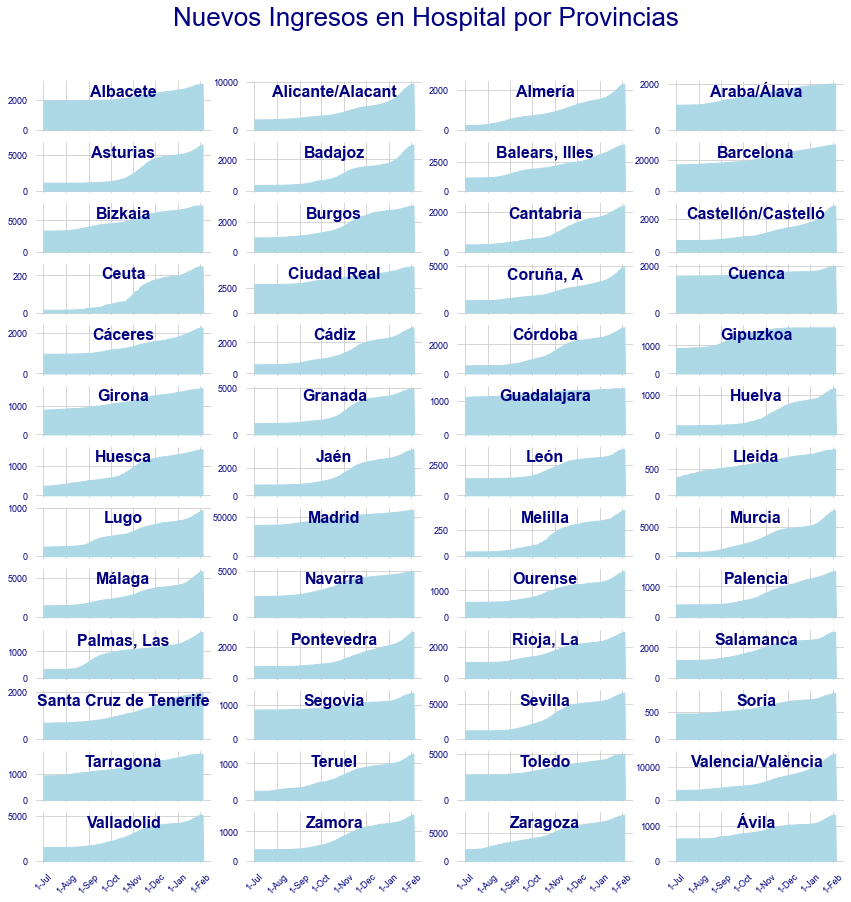

In [19]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province',hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0,sharey=False)

# Título

titulo = 'Nuevos Ingresos en Hospital por Provincias'


#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d-%-b')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    #ax1.set_ylim(0,10000)
    #ax1.set_yticks([0,2000,4000])
    
    #ax1.set_yticks([])
    ax1.yaxis.set_tick_params(labelsize=9,width=0,labelcolor=color_titulos)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=9,width=0,labelcolor=color_titulos,rotation=45)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
g.map(grafica,'province')


g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
g.fig.subplots_adjust(top=.9,wspace=0.2,hspace=0.2)
plt.savefig('img/hospitalizados.png',dpi=100)  
#plt.tight_layout()
plt.show()


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por Comunidades siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

In [ ]:
def grafico_IA7_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    
    clave_ratio_IA7 = 'tasa_ia7_7_dias'
    IA7='incidencia_acumulada_7'
    
    
    titulo = 'Incidencia Acumulada de 7 días por 100.000 hab (Azul) \n En rojo: ratio de la IA7(día n) respecto a la IA7(día n-7)'
    y_IA='IA a 7 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]
    
    y_max = datos_[IA7].max()
    
    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%b')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[IA7],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1500)
        #ponemos limites variables dependiendo del maximo valor truncado a 100
        ax1.set_ylim(0,(y_max//100+1)*100)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy',rotation=45)
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        #vamos a imprimir el valor de la última IA14
        style = dict(size=12, color=color_titulos,weight='normal')
        texto = ax1.annotate('{:0.1f}'.format(df_datos.iloc[-1][IA7]),
                            xy=(df_datos.iloc[-1]['date'],df_datos.iloc[-1][IA7]),
                            xycoords='data',
                            xytext=(0, 0), 
                            textcoords='offset points',
                            **style)
        
        #Aqui presentamos la ratio: lo anulo
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio_IA7], lw=.5, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4.0) #la he cambiado desde 4
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.xaxis.set_tick_params(labelsize=14,width=25,length=25,direction='out',labelcolor='navy')
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
        
    g.map(grafica,'province')



    g.set_titles('')
    g.set(xlabel='')
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

In [ ]:
grafico_IA7_ratio(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Asturias'],'asturias_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Cantabria'],'cantabria_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
                  ,'castilla_leon_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'],'castilla_lamancha_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Ceuta'],'ceuta_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Balears, Illes'],'baleares_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Madrid'],'Madrid_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Melilla'],'melilla_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Murcia'],'murcia_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Navarra'],'navarra_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Rioja, La'],'rioja_IA7')

In [ ]:
grafico_IA7_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia_IA7')

In [ ]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    
    clave_ratio_IA14 = 'tasa_ia14_7_dias'
    IA14 = 'incidencia_acumulada_14'
    
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n En rojo: ratio de la IA14(día n) respecto a la IA14(día n-7)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]
    
    y_max = datos_[IA14].max()
    
    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%b')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[IA14],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1500)
        #ponemos limites variables dependiendo del maximo valor truncado a 100
        ax1.set_ylim(0,(y_max//100+1)*100)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy',rotation=45)
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        #vamos a imprimir el valor de la última IA14
        style = dict(size=12, color=color_titulos,weight='normal')
        texto = ax1.annotate('{:0.1f}'.format(df_datos.iloc[-1][IA14]),
                            xy=(df_datos.iloc[-1]['date'],df_datos.iloc[-1][IA14]),
                            xycoords='data',
                            xytext=(0, 0), 
                            textcoords='offset points',
                            **style)
        
        #Aqui presentamos la ratio: lo anulo
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio_IA14], lw=.5, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4.0) #la he cambiado desde 4
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.xaxis.set_tick_params(labelsize=14,width=25,length=25,direction='out',labelcolor='navy')
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
        
    g.map(grafica,'province')



    g.set_titles('')
    g.set(xlabel='')
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

In [ ]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura_ia14')

In [ ]:
grafico_IA14_ratio(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')

In [ ]:
grafico_IA14_ratio(datos,campos,['Huesca','Teruel','Zaragoza'],'aragon_ia14')

In [ ]:
grafico_IA14_ratio(datos,campos,['Asturias'],'asturias_ia14')

In [ ]:
grafico_IA14_ratio(datos,campos,['Cantabria'],'cantabria_ia14')

In [ ]:
grafico_IA14_ratio(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña_ia14')

In [ ]:
grafico_IA14_ratio(datos,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
                  ,'castilla_leon_ia14')

In [ ]:
grafico_IA14_ratio(datos,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'],'castilla_lamancha_ia14')

In [ ]:
grafico_IA14_ratio(datos,campos,['Ceuta'],'ceuta_ia14')

In [ ]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura_ia14')

In [ ]:
grafico_IA14_ratio(datos,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia')

In [ ]:
grafico_IA14_ratio(datos,campos,['Balears, Illes'],'baleares')

In [ ]:
grafico_IA14_ratio(datos,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias')

In [ ]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

In [ ]:
grafico_IA14_ratio(datos,campos,['Melilla'],'melilla')

In [ ]:
grafico_IA14_ratio(datos,campos,['Murcia'],'murcia')

In [ ]:
grafico_IA14_ratio(datos,campos,['Navarra'],'navarra')

In [ ]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

In [ ]:
grafico_IA14_ratio(datos,campos,['Rioja, La'],'rioja')

In [ ]:
grafico_IA14_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

# Gráficos Hospitalizados

In [ ]:
def grafico_hospitalizados (datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    hospitalizados = 'hospitalized_per_100000'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1000)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/hospit_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

In [ ]:
grafico_hospitalizados(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

# Multi provincia con Hospitalizados

In [ ]:

#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título

hospitalizados = 'hospitalized_per_100000'
uci ='intensive_care_per_1000000'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
    #ax1.set_ylim(0,1200)
    #ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[uci], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    #ax2.set_ylim(0,4)
    #ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/hosp_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


In [ ]:
def grafico_IA14_ratio_vs(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    color_tags = 'navy'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (EjeX) \n Ratio de la IA a 7 días (EjeY)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    #diccionario con el tamaño de los textos dependiendo del numero de columnas:
    #key=nº columnas, values=(tamaño titulos, nombre provincia, tamaño tags,ratio)
    
    text_size={1:(16,16,12,2),2:(22,20,14,2),3:(24,24,16,1.5)}
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(15,15))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', 
                      margin_titles=False, col_wrap=columnas,aspect=text_size[columnas][3], 
                      height=5.0, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    
    x_min = datos_[AI].min()
    x_max = ((datos_[AI].max() // 100)+1)*100
    y_min = datos_[clave_ratio].min()
    y_max = ((datos_[clave_ratio].max() // .5)+1)*.5
    if (y_max != y_max) or (y_max>3):
        y_max = 2
    print (columnas, y_max)
    
    
    def grafica(x, color, label):
        
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        colores1 = sns.color_palette("Blues",df_datos.shape[0])
        
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, 1.0, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=text_size[columnas][1],transform=ax1.transAxes)
        #metemos este cambio para que no intente imprimirla y se va de escala el gráfico
        df_datos.loc[:,clave_ratio]=df_datos.loc[:,clave_ratio].apply(lambda x:min(x,3.0))
        ax1.scatter(df_datos[AI],df_datos[clave_ratio],color=colores1)
    
    
        ax1.set_ylim(0,y_max)
        ax1.set_yticks(list(np.arange(0,y_max,1)))
        ax1.set_yticks([0,.5,1,1.5,2,2.5])
        
        ax1.set_xlim(0,x_max)
        #ax1.set_xlim(180,220)
        
        #ax1.set_xticks(np.arange(0,x_max,200))
        
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        #ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=18,width=5,length=10,labelcolor='navy')
        #ax1.set_xticks([])
        ax1.grid(False,axis='both',which='both')
        
        df_datos = df_datos.reset_index(drop=True)
        rango=np.arange(0,len(df_datos.index),15)
        rang=np.unique(np.append([0],rango))
        if abs(rang[-1]-len(df_datos.index)) >= 5:
            rang=np.unique(np.append(rango,[0,len(df_datos.index)-1]))
        df_datos= df_datos.iloc[list(rang)]
        ax1.axhline(1,color=color_linea)
        for indice in df_datos.index:
            style = dict(size=text_size[columnas][2], color=color_tags,weight='bold')
            texto = ax1.annotate(df_datos.loc[indice,'date'].strftime('%b%-d'),
                                xy=(df_datos.loc[indice,AI],df_datos.loc[indice,clave_ratio]),
                                xycoords='data',
                                xytext=(5, 5), 
                                textcoords='offset points',
                                **style)
            
        
        
    
    g.map(grafica,'province')



    g.set_titles('')
    g.set(xlabel='')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=text_size[columnas][0],color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=1,pad=1)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+'vs_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Asturias'],'asturias')

In [ ]:
grafico_IA14_ratio(datos,campos,['Sevilla'],'sevilla')

In [ ]:
grafico_IA14_ratio(datos,campos,['Huelva'],'huelva')

In [ ]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

In [ ]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Madrid'],'madrid')

In [ ]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz','Cáceres'],'extremadura')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz'],'badajoz')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Cáceres'],'Caceres')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Cantabria'],'cantabria')

In [ ]:
datos.loc[datos['province']=='Madrid']

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona'],'barcelona')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Ceuta'],'ceuta')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Melilla'],'melilla')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Navarra'],'navarra')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Rioja, La'],'rioja')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Sevilla'],'sevilla')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Huelva'],'huelva')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

In [ ]:
grafico_IA14_ratio_vs(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')